In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
data= pd.read_csv('nba-players.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [305]:
data.head(10)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


# Checking the dataset distribution 

In [306]:
data['target_5yrs'].value_counts()/len(data)

1    0.620149
0    0.379851
Name: target_5yrs, dtype: float64

# Seperating dependent and independent variable

In [307]:
X=data.drop(columns=['target_5yrs','Unnamed: 0','name'])
Y=data['target_5yrs']

In [308]:
X.shape

(1340, 19)

In [309]:
Y.shape

(1340,)

# Scaling the dataset

In [310]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

# Splitting the dataset

In [311]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.50,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((670, 19), (670, 19), (670,), (670,))

# Model Building, predictions and odds ratio

In [312]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[0.38053212, 0.61946788],
        [0.25108315, 0.74891685],
        [0.69839981, 0.30160019],
        ...,
        [0.45098438, 0.54901562],
        [0.85319948, 0.14680052],
        [0.65910427, 0.34089573]]),
 (670, 2))

In [313]:
y_train.shape

(670,)

In [314]:
predicted_values.shape

(670,)

In [315]:
y_test.shape

(670,)

# Confusion matrix LR

In [316]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[174,  80],
       [137, 279]])

1.Accuracy

In [317]:
classifier.score(x_test,y_test)

0.6761194029850747

2.Calculating the precision score

In [318]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [319]:
precision

array([0.55948553, 0.77715877])

In [320]:
recall

array([0.68503937, 0.67067308])

In [321]:
f1

array([0.6159292, 0.72     ])

In [322]:
support

array([254, 416])

Only for representation

In [323]:
from sklearn.metrics import classification_report
k=classification_report(y_train,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.37      0.45      0.40       255
           1       0.61      0.53      0.56       415

    accuracy                           0.50       670
   macro avg       0.49      0.49      0.48       670
weighted avg       0.52      0.50      0.50       670



In [324]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.56      0.69      0.62       254
           1       0.78      0.67      0.72       416

    accuracy                           0.68       670
   macro avg       0.67      0.68      0.67       670
weighted avg       0.69      0.68      0.68       670



# Precision-Recall Curve LR

In [325]:
#gathering Precision/recall scores from different threshold
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((654,), (654,), (653,))

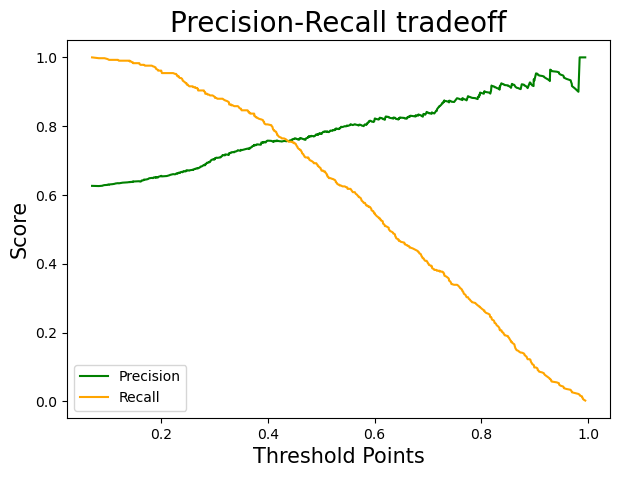

In [326]:
#compare if threshold is less than precision & recall 
#if less -1 minus in plotting
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC Curve LR

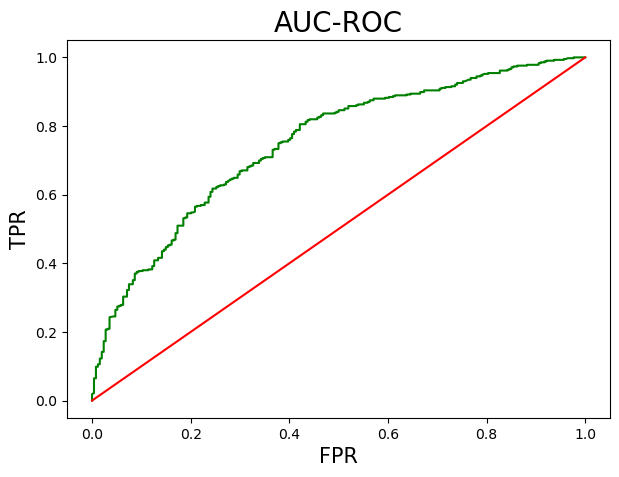

0.7474021426408237

In [327]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Coefficients Plot

In [328]:
#arranging the data
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({
    'coefficients':c,
    'variable':x
})
#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
1,-0.772940,min
13,-0.496275,dreb
10,-0.328503,fta
7,-0.284330,3pa
16,-0.064842,stl


Text(0.5, 1.0, 'Coefficients plot')

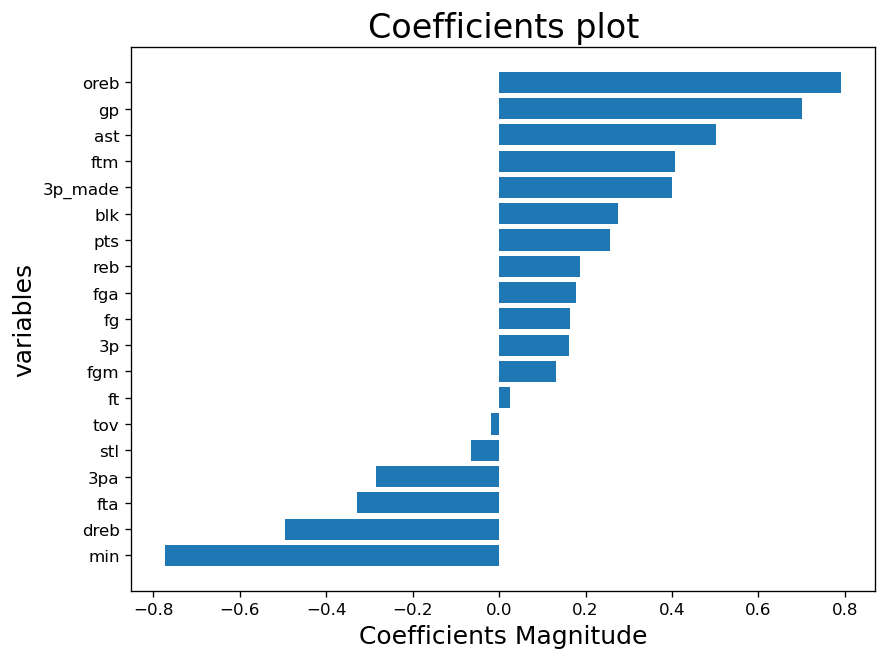

In [329]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("Coefficients Magnitude",fontsize=15)
plt.ylabel('variables',fontsize=15)
plt.title('Coefficients plot',fontsize=20)

# Decision Tree

In [330]:
#from sklearn.tree import DecisionTreeClassifier as DTC
#classifier=DTC(class_weight='balanced')
#classifier=DTC()
#classifier.fit(x_train,y_train)
#predicted_values=classifier.predict(x_train)

In [331]:
#predicted_values[:30]

In [332]:
#y_train.shape

In [333]:
#predicted_values.shape

In [334]:
#from sklearn.metrics import classification_report
#print(classification_report(y_train,predicted_values))

In [335]:
#y_test.shape

In [336]:
#predicted_values.shape

In [337]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,predicted_values))

 1.Visualizing the decision tree

In [338]:
#!pip install graphviz

In [339]:
#from sklearn.tree import export_graphviz
#export_graphviz(decision_tree=classifier,out_file='tree_viz',max_depth=None,feature_name=X.columns,label=None,impurity=False)
#from graphviz import render
#render()

# Bagging

In [340]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [341]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator=LR(),
               n_estimators=150,
              n_jobs=-1,
           random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [342]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60       255
           1       0.75      0.82      0.78       415

    accuracy                           0.72       670
   macro avg       0.70      0.69      0.69       670
weighted avg       0.71      0.72      0.71       670



In [343]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       254
           1       0.74      0.83      0.78       416

    accuracy                           0.72       670
   macro avg       0.70      0.68      0.69       670
weighted avg       0.71      0.72      0.71       670



# Confusion matrix

In [344]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[136, 118],
       [ 72, 344]])

1. Accuracy

In [345]:
classifier.score(x_test,y_test)

0.7164179104477612

2. Calculating the precision score

In [346]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [347]:
precision

array([0.65384615, 0.74458874])

In [348]:
recall

array([0.53543307, 0.82692308])

In [349]:
f1

array([0.58874459, 0.78359909])

In [350]:
support #support is nothing but the no of instances for class 1 and class 0

array([254, 416])

Only for representation

In [351]:
from sklearn.metrics import classification_report
k=classification_report(y_train,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       255
           1       0.61      0.68      0.65       415

    accuracy                           0.54       670
   macro avg       0.49      0.49      0.49       670
weighted avg       0.52      0.54      0.53       670



In [352]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       254
           1       0.74      0.83      0.78       416

    accuracy                           0.72       670
   macro avg       0.70      0.68      0.69       670
weighted avg       0.71      0.72      0.71       670



# Precision-Recall Curve-Bagging

In [353]:
#gathering Precision/recall scores from different threshold
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((654,), (654,), (653,))

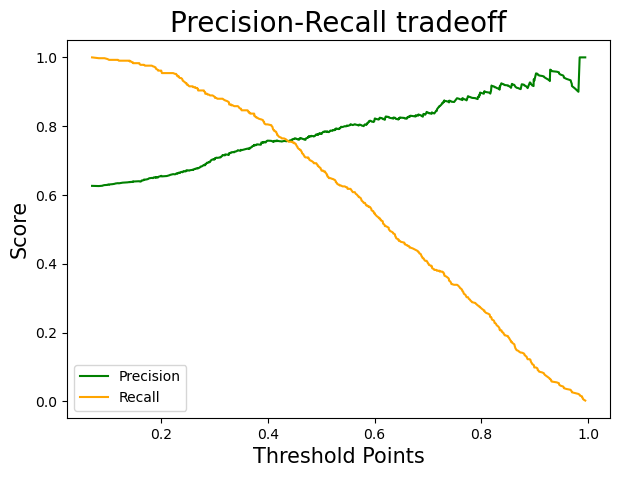

In [354]:
#compare if threshold is less than precision & recall 
#if less -1 minus in plotting
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC Curve-Bagging

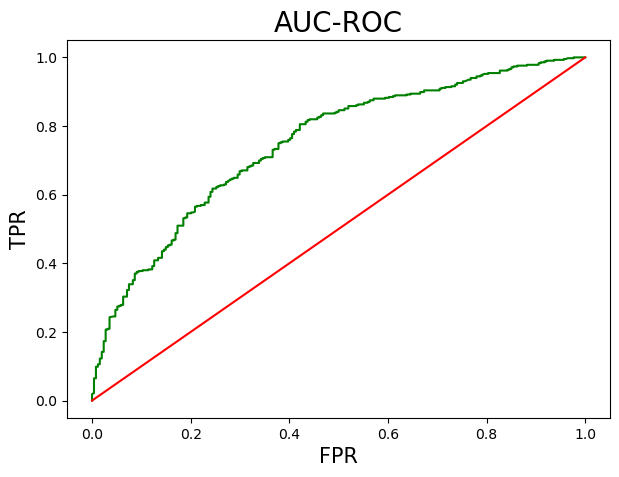

0.7474021426408237

In [355]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Random Forest

In [356]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [357]:
classifier=RFC()
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       255
           1       1.00      1.00      1.00       415

    accuracy                           1.00       670
   macro avg       1.00      0.99      1.00       670
weighted avg       1.00      1.00      1.00       670



In [358]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       254
           1       0.73      0.83      0.78       416

    accuracy                           0.70       670
   macro avg       0.68      0.66      0.67       670
weighted avg       0.70      0.70      0.69       670



In [359]:
#calc_score to take model and the data and return the performance of the model

In [360]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
 model.fit(x1,y1)
 predict=model.predict(x1)
 f1=f1_score(y1,predict)
 predict=model.predict(x2)
 f2=f1_score(y2,predict)
 return f1,f2

In [361]:
#effect to visualize how the different values of the parameter affect the performance of the model

In [362]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(7,4),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_Score')
    plt.plot(x_axis,test_score,color='blue',label='test_Score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1_score")
    plt.show()

In [363]:
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [364]:
estimators=[i for i in range(1,600,10)]
train=[]
test=[]
for i in estimators:
    model=RFC(class_weight='balanced_subsample',
             n_estimators=i,
             n_jobs=-1,
             max_depth=7,
             random_state=101)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

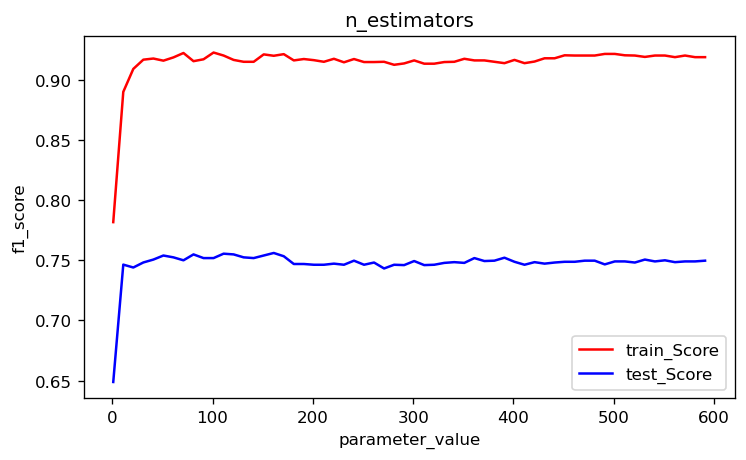

In [365]:
effect(train,test,range(1,600,10),'n_estimators')

# max_samples

In [366]:
maxsamples=[i/1000 for i in range(1,1000)]
train=[]
test=[]

for i in maxsamples:
    model=RFC(class_weight="balanced_subsample",n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_samples=i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

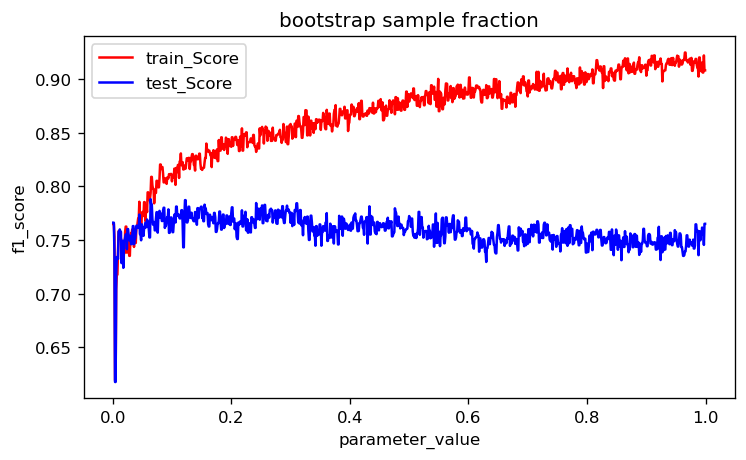

In [367]:
effect(train,test,maxsamples,'bootstrap sample fraction')

# max_features

In [368]:
maxfeatures=range(1,X.shape[1])
train=[]
test=[]

for i in maxfeatures:
 model=RFC(class_weight="balanced_subsample",n_estimators=50,
             n_jobs=-1,max_depth=7,random_state=101,max_features=i)
 f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
 train.append(f1)
 test.append(f2)

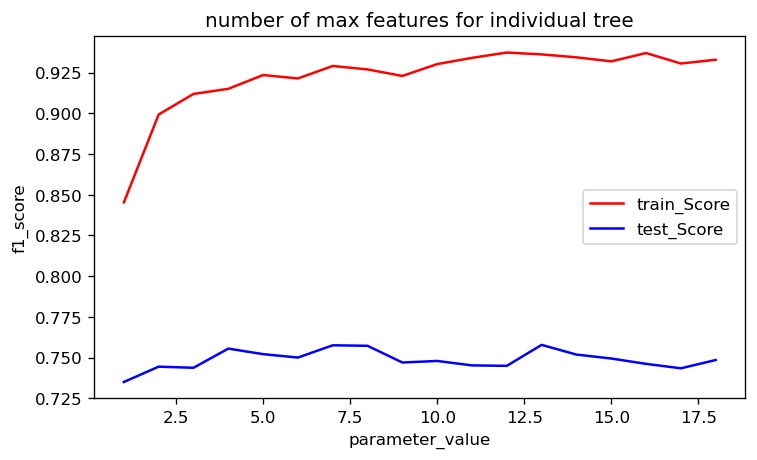

In [369]:
effect(train,test,maxfeatures,'number of max features for individual tree')

In [129]:
#default parameter value=sqrt(number of features present in the dataset)

In [137]:
#perform regularization to reduce overfitting spotted in maxfeatures